In [10]:
import numpy as np
import pandas as pd

In [11]:
rush_yards_cols = ['yardline_100',
 'down',
 'goal_to_go',
 'ydstogo',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'game_seconds_remaining',
 'wind',
 'temp',
 'spread_line',
 'total_line',
 'carries_roll',
 'rushing_yards_roll',
 'yards_per_carry_roll',
 'rushing_yards_team_roll',
 'rushing_yards_opp_roll']


In [36]:

rushes = pd.read_parquet('nn_rush_data.parquet')
rush_yards_cols = rush_yards_cols[0:4]
X = rushes[rush_yards_cols]
train_yards = rushes['yards_shifted']
train_TD = rushes['touchdown']

In [44]:
samples.astype(int)

array([ 3,  2,  0,  0, -1,  2,  0,  0,  1, -1, -1, -5, -1,  3,  3,  0,  1,
        0, -1,  3,  1, -1, -2, -6,  0,  0,  1,  2, -1,  3,  2,  1,  1,  0,
        4,  1, -1,  0,  0, 10,  4,  1,  1,  0,  1, -2,  2, -4,  0,  6,  2,
        2,  3,  0,  0,  0,  5,  1,  0,  3, -2,  5,  3,  0,  2,  4,  1,  5,
       -2,  4, -5,  0,  0, -3,  0,  6,  1, -3,  5,  0,  6,  4,  1,  2,  7,
        1,  3, -2,  3,  0,  0,  9,  4,  2,  2,  0,  0,  6, -3,  0,  1, -1,
        0, -4, -1,  1,  2,  0,  0,  4,  3,  3,  0,  1, -1, -1,  2,  0,  1,
       -3,  1,  0, -1,  3,  3,  2,  0,  0,  1,  0,  0, -1,  0,  3,  6,  6,
        0, -1,  1,  4,  2,  3,  1,  0,  0,  3, -2,  0,  6,  4,  8,  0,  4,
        4,  1,  3,  4,  1, -1, -6, -1, -3, -5,  2,  0,  4, -1,  0,  6,  3,
        4,  0,  1,  0,  0,  7,  0,  1,  4, -3,  3,  0, -1,  0,  6, -1,  3,
        0,  1,  6,  3,  8,  2,  1,  1,  4,  4, -4,  0,  3, -2, -1, -1,  0,
        0,  0, -5, -3,  2,  0,  4,  0,  3,  0,  3,  2,  3,  2,  3,  2,  4,
        5,  2,  1,  0,  2

In [95]:
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
# Parameters for the skewed Gaussians
mu1, sigma1, skew1, weight1 = 1.54, 5, 1, 0.93 # mean, std, skewness, weight for the first Gaussian
mu2, sigma2, skew2, weight2 = 4.6, .01, 0, 0.07  # mean, std, skewness, weight for the second Gaussian

# Number of samples
n_samples = 1000

# Generate samples from the two skewed Gaussians
n_samples_1 = int(weight1 * n_samples)
n_samples_2 = n_samples - n_samples_1
samples_1 = skewnorm.rvs(skew1, loc=mu1, scale=sigma1, size=n_samples_1)
samples_2 = skewnorm.rvs(skew2, loc=mu2, scale=sigma2, size=n_samples_2)

# Combine the samples
samples = np.concatenate([samples_1, samples_2])

# Plot the histogram of the samples
#plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

# Plot the individual Gaussian distributions
x = np.linspace(min(samples), max(samples), 1000)
pdf1 = weight1 * (1/np.sqrt(2 * np.pi * sigma1**2)) * np.exp(-(x - mu1)**2 / (2 * sigma1**2))
pdf2 = weight2 * (1/np.sqrt(2 * np.pi * sigma2**2)) * np.exp(-(x - mu2)**2 / (2 * sigma2**2))

# Plot the mixture of Gaussians
#plt.plot(x, pdf1 + pdf2, label="Mixture of Gaussians", color='r')

#plt.legend()
#plt.show()


(array([0.        , 0.00142248, 0.00142248, 0.00142248, 0.00426743,
        0.0056899 , 0.01849218, 0.02418208, 0.05547653, 0.06827881,
        0.07539118, 0.08961593, 0.11237553, 0.10810811, 0.15362731,
        0.22332859, 0.056899  , 0.        , 0.        ]),
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]),
 <BarContainer object of 19 artists>)

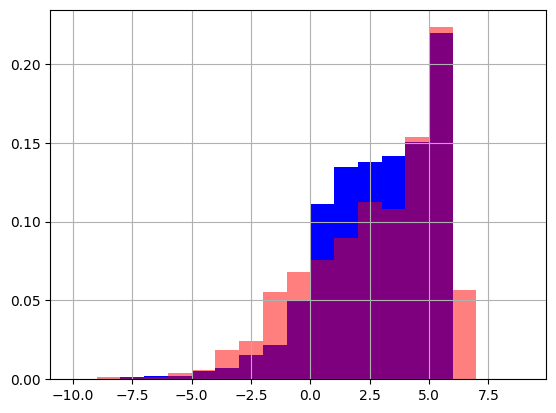

In [96]:
ydl = 5

vals = rushes.loc[rushes.yardline_100 == ydl]['yards_gained']
vals.hist(color='b', bins=range(-10,10),density=True)
plt.hist(np.round(samples[samples < 6]).astype(int), color='r', alpha=0.5, bins=range(-10,10), density=True)

166       2.0
307       3.0
416       4.0
740       2.0
1013      3.0
         ... 
211900    3.0
212118    3.0
212124   -2.0
212154    4.0
212209    0.0
Name: yards_gained, Length: 1275, dtype: float32